In [20]:
import os
import parse
import fasttext
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
# plt.style.use(["science", "ieee"])


In [3]:
model_file = "/home/peterr/macocu/taskB/data/models/ftmodel_3.bin"

model = fasttext.load_model(model_file)

In [41]:
setimes_test_path = "/home/peterr/macocu/taskB/data/interim/test.fasttxt"
setimes_train_path = "/home/peterr/macocu/taskB/data/interim/train.fasttxt"
twitter_path = "/home/peterr/macocu/taskB/data/interim/twitter.json"

def get_setimes_labels_text(path):
    labels, texts = list(), list()
    with open(path,"r") as f:
        pattern = "__label__{language} {text}"
        p = parse.compile(pattern)
        for line in f.readlines():
            rez = p.parse(line)
            labels.append(rez["language"])
            texts.append(rez["text"].replace("\n", " "))
    return labels, texts

def get_twitter_labels_text(path):
    labels, texts = list(), list()
    import json
    with open(path, "r") as f:
        content = json.load(f)
    for user, data in content.items():
        language = data["language"]
        for tweet in data["tweets"]:
            labels.append(language)
            texts.append(tweet.replace("\n", " "))
    return labels, texts

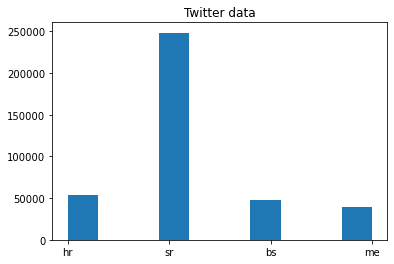

In [19]:
l,t = get_twitter_labels_text(twitter_path)
plt.hist(l)
plt.title("Twitter data")
plt.savefig("images/twitter.png")
plt.show()

## Evaluating the model on SETIMES dataset:

In [39]:
y_true, texts = get_setimes_labels_text(setimes_test_path)
y_pred =  [i[0].replace("__label__", "") for i in model.predict(texts)[0]]


accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:0.3}")
f1 = f1_score(y_true, y_pred, labels=list(set(y_true)), average="macro")
print(f"F1 score: {f1:0.3}")

Accuracy: 0.997
F1 score: 0.996


## Evaluating the model on twitter data

In [42]:
y_true, texts = get_twitter_labels_text(twitter_path)
y_pred =  [i[0].replace("__label__", "") for i in model.predict(texts)[0]]


accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:0.3}")
f1 = f1_score(y_true, y_pred, labels=list(set(y_true)), average="macro")
print(f"F1 score: {f1:0.3}")

Accuracy: 0.375
F1 score: 0.246


In [45]:
model.predict(["Čovek", "Čovjek"], k=3)

([['__label__sr', '__label__hr', '__label__bs'],
  ['__label__bs', '__label__sr', '__label__hr']],
 [array([0.8810873 , 0.09140356, 0.02753914], dtype=float32),
  array([0.68419594, 0.17656893, 0.13926509], dtype=float32)])